In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import scipy.stats as stats

In [7]:
df_erf = pd.read_excel('erp.xlsx')
df_liaison = pd.read_excel('liaison.xlsx')
df_web = pd.read_excel('web.xlsx')

c:\Users\ndele\Desktop\try_lecture_jupyter\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\ndele\Desktop\try_lecture_jupyter\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\ndele\Desktop\try_lecture_jupyter\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Sommaire

[Analyse et Clean up des dataframes importés](#Analyse_et_Clean_up_des_dataframes_importés) <br/>
[Extrait dataframe ERF](#Extrait_dataframe_ERF) <br/>
[Extrait dataframe Web](#Extrait_dataframe_Web) <br/>
[Extrait dataframe liaison](#Extrait_dataframe_liaison) <br/>

[Mise en forme de la typologie et vérification des données NULL](#Mise_en_forme_de_la_typologie_et_vérification_des_données_NULL) <br/>
[Typologie df_erf](#Typologie_df_erf) <br/>
[Typologie df_web](#Typologie_df_web) <br/>
[Typologie df_liaison](#Typologie_df_liaison) <br/>

[Execution des modifications](#Execution_des_modifications) <br/>
[Suppression des bons cadeaux](#Suppression_des_bons_cadeaux) <br/>
[Modification des dénominations non conformes de valeurs](#Modification_des_dénominations_non_conformes_de_valeurs) <br/>
[Conversion du format des colonnes sku en numérique](#Conversion_du_format_des_colonnes_sku_en_numérique) <br/>

[Problématique des doublons](#Problématique_des_doublons) <br/>
[Relevé des doublons potentiels pour le dataframe ERF](#Relevé_des_doublons_potentiels_pour_le_dataframe_ERF) <br/>
[Relevé des doublons potentiels pour le dataframe Liaison](#Relevé_des_doublons_potentiels_pour_le_dataframe_Liaison) <br/>
[Relevé des doublons potentiels pour le dataframe Web](#Relevé_des_doublons_potentiels_pour_le_dataframe_Web) <br/>
[Analyse de la problématique de doublons du dataframe df_web](#Analyse_de_la_problématique_de_doublons_du_dataframe_df_web) <br/>
[Résolution de la problématique de doublons du dataframe df_web](#Résolution_de_la_problématique_de_doublons_du_dataframe_df_web) <br/>

[Jointures](#Jointures) <br/>
[Merge df_erf et df_liaison into df_j1](#Merge_df_erf_et_df_liaison_into_df_j1) <br/>
[Merge df_j1 et df_web into df_ventes](#Merge_df_j1_et_df_web_into_df_ventes) <br/>
[Vérification et résolution d erreurs potentiels aux merges](#Vérification_et_résolution_d_erreurs_potentiels_aux_merges) <br/>

[Outliers](#Outliners) <br/>
[Analyse graphique](#Analyse_graphique) <br/>
[Analyse des intervales interquartiles](#Analyse_des_intervales_interquartiles) <br/>
[Analyse du z-score](#Analyse_du_z-score) <br/>
[Merge des Outliers](#Merge_des_Outliners) <br/>

[Calcul du Chiffre d Affaire](#Calcul_du_Chiffre_d_Affaire) <br/>
[Chiffre d affaire global](#Chiffre_d_affaire_global) <br/>
[Moyenne du chiffre d affaire par produit](#Moyenne_du_chiffre_d_affaire_par_produit) <br/>
[Listing des Outliers considérés dans ce calcul](#Listing_des_Outliners_considérés_dans_ce_calcul) <br/>

[Conclusion](#Conclusion)

## Analyse et Clean up des dataframes importés
<a id='Analyse_et_Clean_up_des_dataframes_importés'></a>

### Extrait dataframe ERF
<a id='Extrait_dataframe_ERF'></a>

In [8]:
df_erf.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [9]:
df_erf.shape

(825, 5)

### Extrait dataframe Web
<a id='Extrait_dataframe_Web'></a>

In [10]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
df_web.shape

(1513, 28)

### Extrait dataframe liaison
<a id='Extrait_dataframe_liaison'></a>

In [12]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [13]:
df_liaison.shape

(825, 2)

## Mise en forme de la typologie et vérification des données NULL
<a id='Mise_en_forme_de_la_typologie_et_vérification_des_données_NULL'></a>

### Typologie df_erf
<a id='Typologie_df_erf'></a>

In [14]:
df_erf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [15]:
# La typologie de ce dataframe semble correspondre à c qui était attendu, et il n'y a pas de valeurs NULL à relever

### Typologie df_web
<a id='Typologie_df_web'></a>

In [16]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [17]:
# la typologie des modalités semblent ici correspondre, sauf pour ce qui est de la modalité -sku-. De plus, en nous focalisant sur les modalités que nous utiliserons probablement pour notre étude : pour la modalité -sku-, 85 valeurs sont déclarées NULL, et pour ce qui est de la modalité -total_sales-, 83 valeurs sont déclarées NULL.

In [18]:
sum(df_web.sku.isnull())

85

In [19]:
# 85 valeurs sont déclarées NULL dans la modalité sku

In [20]:
sum(pd.to_numeric(df_web.sku, errors='coerce').isnull())

89

In [21]:
# Mais en considérant les valeurs qui ne peuvent être converties en numérique, on peut relever 89 valeurs NULL, soit (89-85 =) 4 valeurs qui empêche de convertir les modalité en type numérique. Quelles sont ces valeurs ? 

In [22]:
temp_2 = df_web.loc[pd.to_numeric(df_web.sku, errors='coerce').isnull()]
temp_2

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
temp_2.loc[~temp_2.sku.isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [24]:
# L'erreur semble venir de la dénomination des valeurs dans -sku-. Là où nous attendons des valeurs numériques, nous avons des désignation nominales, ou avec des caractères relevant de string et non pas de float ou int (tels que "-") 

In [25]:
# Si nous désirons changer les valeurs comprenant un "-", il convient de voir avant ces même valeurs sans cette particularité, pour éviter de créer des faux doublons.

In [26]:
df_web.loc[df_web['sku']==13127]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
18,13127,0,0,0,0.0,23.0,taxable,NaN,2.0,2018-02-12 11:18:33,...,clos-du-mont-olivet-chateauneuf-du-pape-2012,2020-08-24 18:25:02,2020-08-24 16:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
816,13127,0,0,0,0.0,23.0,NaN,NaN,2.0,2018-02-12 11:18:33,...,clos-du-mont-olivet-chateauneuf-du-pape-2012,2020-08-24 18:25:02,2020-08-24 16:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [27]:
# Nous analyserons aussi la valeur 14680-1, car cette erreur nominative se retrouvera dans la table liaison.

In [28]:
df_web.loc[df_web['sku']==14680]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
354,14680,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-04-18 22:06:42,...,domaine-saint-nicolas-fiefs-vendeens-blanc-le-...,2020-08-08 17:45:03,2020-08-08 15:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1136,14680,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-04-18 22:06:42,...,domaine-saint-nicolas-fiefs-vendeens-blanc-le-...,2020-08-08 17:45:03,2020-08-08 15:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [29]:
df_web.loc[df_web['sku']=='14680-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [30]:
df_web.loc[df_web['sku']=='13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### Typologie df_liaison
<a id='Typologie_df_liaison'></a>

In [31]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [32]:
825-734

91

In [33]:
# Pour ce qui est des modalités product_id, la typologie semble correspondre et il n'y a pas de valeurs NULL à relever. Néanmoins, pour ce qui est de la modalité id_web, le Dtype relevé est -object-, alors qu'il est attendu d'avoir un type numérique. De plus, 91 valeurs sont déclarées NULL. 

In [34]:
sum(df_liaison.id_web.isnull())

91

In [35]:
# 91 valeurs sont déclarées NULL dans la modalité sku

In [36]:
sum(pd.to_numeric(df_liaison.id_web, errors='coerce').isnull())

94

In [37]:
# Mais en considérant les valeurs qui ne peuvent être converties en numérique, on peut relever 94 valeurs NULL, soit (94-91 =) 3 valeurs qui empêche de convertir les modalité en type numérique. Quelles sont ces valeurs ? 

In [38]:
temp = df_liaison.loc[pd.to_numeric(df_liaison.id_web, errors='coerce').isnull()]
temp

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
819,7201,NaN
820,7203,NaN
821,7204,NaN
822,7247,13127-1


In [39]:
temp.loc[~temp.id_web.isnull()]

,product_id,id_web
443,4954,bon-cadeau-25-euros
822,7247,13127-1
823,7329,14680-1


In [40]:
# Pour ce qui est du bon cadeau, est-il offert , ou acheter à dépenser ultérieurement ?

In [41]:
df_erf.loc[df_erf['product_id']==4954]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [42]:
# On constate ici que le bon cadeau est un bien acheté, mais étant un bon cadeau, son prix sera imputé sur le prochain article acheté avec celui-ci. Je prends le partie de ne pas considérer cet article pour éviter toute problématique future. Considérons que nous achetons 10 biens à 75€ et un bon cadeau à 25€, il devrait avoir à la fin 775€ dans la caisse. Mais nous n'avons que 750€ dans la caisse, car sur l'achat des 10 biens à 75€ nous retirons 25€ du bon cadeau. Cela peut engendrer des erreurs sur les calculs futurs.

In [43]:
# Pour ce qui est des id_web -13127-1- et -14680-1-, peut-on considérer que l'ajout d'un -1 serait l'équivalent d'un "bis" pour une adresse ? Vérifions

In [44]:
df_liaison.loc[df_liaison['id_web']==13127]

,product_id,id_web
17,4053,13127


In [45]:
df_liaison.loc[df_liaison['id_web']==14680]

,product_id,id_web
363,4757,14680


In [46]:
# Comparons les articles et leurs bis (-1), tout d'abord avec le sku -13127- dont le product_id est de -4053- puis avec le id_web -13127-1- dont le product_id est de 7247

In [47]:
df_erf.loc[df_erf['product_id']==4053]

,product_id,onsale_web,price,stock_quantity,stock_status
17,4053,1,44.3,16,instock


In [48]:
df_erf.loc[df_erf['product_id']==7247]

,product_id,onsale_web,price,stock_quantity,stock_status
822,7247,1,54.8,23,instock


In [49]:
# Puis avec le id_web -14680- dont le product_id est de -4757- puis le sku -14680-1- dont le product_id est de -7329-

In [50]:
df_erf.loc[df_erf['product_id']==4757]

,product_id,onsale_web,price,stock_quantity,stock_status
363,4757,1,26.5,1,instock


In [51]:
df_erf.loc[df_erf['product_id']==7329]

,product_id,onsale_web,price,stock_quantity,stock_status
823,7329,0,26.5,14,instock


In [52]:
# Les produits ne disposent pas du même prix pour certains, et pas du même stock pour tous. On peut considérer donc ces produits comme des produits distincts. Je prend le partie de ne pas les supprimer, mais de redéfinir la dénomination de leur id_web pour permettre la convertion en numérique de la modalité sku.

## Execution des modifications
<a id='Execution_des_modifications'></a>

### Suppression des bons cadeaux
<a id='Suppression_des_bons_cadeaux'></a>

In [53]:
df_erf.loc[df_erf['product_id']==4954]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [54]:
df_erf.drop(df_erf[df_erf['product_id']==4954].index, inplace=True)

In [55]:
df_erf.loc[df_erf['product_id']==4954]

,product_id,onsale_web,price,stock_quantity,stock_status


In [56]:
df_web.loc[df_web['sku']=='bon-cadeau-25-euros']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [57]:
df_web.drop(df_web[df_web['sku']=='bon-cadeau-25-euros'].index, inplace=True)

In [58]:
df_web.loc[df_web['sku']=='bon-cadeau-25-euros']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [59]:
df_liaison[df_liaison['id_web']=='bon-cadeau-25-euros']

,product_id,id_web
443,4954,bon-cadeau-25-euros


In [60]:
df_liaison.drop(df_liaison[df_liaison['id_web']=='bon-cadeau-25-euros'].index, inplace=True)

In [61]:
df_liaison[df_liaison['id_web']=='bon-cadeau-25-euros']

,product_id,id_web


### Modification des dénominations non conformes de valeurs
<a id='Modification_des_dénominations_non_conformes_de_valeurs'></a>

In [62]:
# Nous allons maintenant procéder à la modification de la dénomination de 13 127-1 et 14 680-1

In [63]:
df_web.loc[df_web['sku']=='13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [64]:
df_web.loc[df_web['sku']=='14680-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [65]:
df_web['sku'].replace({"13127-1": "131271"}, inplace=True)

In [66]:
df_web.loc[df_web['sku']=="131271"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,131271,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,131271,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [67]:
df_liaison.loc[df_liaison['id_web']=='13127-1']

,product_id,id_web
822,7247,13127-1


In [68]:
df_liaison.loc[df_liaison['id_web']=='14680-1']

,product_id,id_web
823,7329,14680-1


In [69]:
df_liaison['id_web'].replace({"13127-1": "131271",
                          "14680-1":"146801"}, inplace=True)

In [70]:
df_liaison.loc[df_liaison['id_web']=='131271']

,product_id,id_web
822,7247,131271


In [71]:
df_liaison.loc[df_liaison['id_web']=='146801']

,product_id,id_web
823,7329,146801


### Conversion du format des colonnes sku en numérique
<a id='Conversion_du_format_des_colonnes_sku_en_numérique'></a>

In [72]:
# Ce qui finalement nous permet de convertir le format des colonnes sku en numérique

In [73]:
df_web.sku = pd.to_numeric(df_web.sku, errors='coerce')

In [74]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 1 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1426 non-null   float64       
 1   virtual                1511 non-null   int64         
 2   downloadable           1511 non-null   int64         
 3   rating_count           1511 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             715 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  post_exc

In [75]:
df_liaison.id_web = pd.to_numeric(df_liaison.id_web, errors='coerce')

In [76]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  824 non-null    int64  
 1   id_web      733 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 19.3 KB


## Problématique des doublons
<a id='Problématique_des_doublons'></a>

### Relevé des doublons potentiels pour le dataframe ERF
<a id='Relevé_des_doublons_potentiels_pour_le_dataframe_ERF'></a>

In [77]:
temp_5 = df_erf.loc[df_erf[['product_id']].duplicated(),:]
temp_5

,product_id,onsale_web,price,stock_quantity,stock_status


In [78]:
# Pas de valeurs doublons pour la table erf à partir de la colonne product_id

### Relevé des doublons potentiels pour le dataframe Liaison
<a id='Relevé_des_doublons_potentiels_pour_le_dataframe_Liaison'></a>

In [79]:
temp_6 = df_liaison.loc[df_liaison[['product_id']].duplicated(),:]
temp_6

,product_id,id_web


In [80]:
# Pas de valeurs doublons pour la table liaison à partir de la colonne product_id

In [81]:
temp_7 = df_liaison.loc[df_liaison[['id_web']].duplicated(),:]
temp_7

,product_id,id_web
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [82]:
temp_7.loc[~temp_7['id_web'].isnull()]

,product_id,id_web


In [83]:
# Pas de valeurs doublons pour la table liaison, si on ne considère pas les valeurs NULL, à partir de la colonne id_web

### Relevé des doublons potentiels pour le dataframe Web
<a id='Relevé_des_doublons_potentiels_pour_le_dataframe_Web'></a>

In [84]:
df_web.shape

(1511, 28)

In [85]:
df_erf.shape

(824, 5)

In [86]:
# il y a une différence de 687 valeurs entre df_web et df_erf, il conviendrai dans l'optique d'une futur jointure de distinguer l'origine de cette différence.

In [87]:
# Ainsi si l'on retire les doublons de df_web.sku

In [88]:
temp_3 = df_web.loc[df_web[['post_name']].duplicated(),:]
temp_3

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135.0,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,131271.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [89]:
# Ainsi que les valeurs NULL

In [90]:
temp_3.loc[~temp_3['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298.0,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814.0,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135.0,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,131271.0,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [91]:
# Nous obtenons 713 valeurs, pratiquement la moitier a été imputé, nous pouvons relever une similarité en nous intéressant à la colonne post type, en effet nous avons d'une part product et de l'autre attachment, qui correspondrait à la représentation (image,jpeg) du produit et non pas du produit en lui même

### Analyse de la problématique de doublons du dataframe df_web
<a id='Analyse_de_la_problématique_de_doublons_du_dataframe_df_web'></a>

In [92]:
# Nous allons tenter une relation entre post_mime_type et post_type pour considérer la relation entre ces deux colonnes

In [93]:
df_web[['post_mime_type','post_type']].pivot_table(index='post_type', columns='post_mime_type', aggfunc=len)

post_mime_type,image/jpeg
post_type,
attachment,713


In [94]:
# On peut relever à travers le pivot_table que les images/jpeg sont rattachées à l'attachment, mais pas du tout au product, ce qui nous permet de souligner une problématique d'un doublon dans la rentrée des produits, où d'une part nous avons les produits (product) et d'autres part l'image associée (attachment/image jpeg), attachment sera donc à effacer pour régler la problématiques de ces doublons pour l'analyse de nos données

In [95]:
temp_4 = df_web.loc[df_web['post_type']=='product']
temp_4

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298.0,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814.0,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135.0,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,131271.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [96]:
# En retirant maintenant les valeurs NULL

In [97]:
temp_4.loc[~temp_4['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298.0,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814.0,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135.0,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,131271.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [98]:
# Nous obtenons donc le même nombre de valeurs entre le dataframe temp3 et le dataframe temp4, ce qui me permet de supposer que les doublons sont dû à la duplicité des produits par l'image qui leur correspond, ainsi je propose de supprimer des entrées ces doublons en supprimant les attachment

### Résolution de la problématique de doublons du dataframe df_web
<a id='Résolution_de_la_problématique_de_doublons_du_dataframe_df_web'></a>

In [99]:
df_web.drop(df_web[df_web['post_type']=='attachment'].index, inplace=True)

In [100]:
df_web.shape

(798, 28)

In [101]:
# La valeur est ici supérieur à celle attendu car elle comprend les valeurs NULL, valeurs que nous supprimerons des dataframes après les jointures afin d'éviter de supprimer des données qui auraient pris sens suite et grâce à la jointure

In [102]:
df_web.loc[~df_web['sku'].isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298.0,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814.0,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135.0,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,131271.0,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [103]:
# Suppression des valeurs NULL de 'sku' avant jointure

In [104]:
df_web = df_web.dropna(subset=['sku'])

In [105]:
df_web.shape

(713, 28)

## Jointures
<a id='Jointures'></a>

### Merge df_erf et df_liaison into df_j1
<a id='Merge_df_erf_et_df_liaison_into_df_j1'></a>

In [106]:
# Nous allons dans un premier temps lier le dataframe erf et le dataframe liaison, les lignes product_id étant correspondantes selon Sylvie

In [107]:
df_j1 = pd.merge(df_erf, df_liaison, on='product_id', how='left')

In [108]:
df_j1.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298.0
1,3849,1,34.3,0,outofstock,15296.0
2,3850,1,20.8,0,outofstock,15300.0
3,4032,1,14.1,0,outofstock,19814.0
4,4039,1,46.0,0,outofstock,19815.0


In [109]:
df_j1.shape

(824, 6)

### Merge df_j1 et df_web into df_ventes
<a id='Merge_df_j1_et_df_web_into_df_ventes'></a>

In [110]:
# Maintenant nous allons joindre le dataframe j1 au dataframe web, nous appellerons ce dataframes : ventes, étant la finalité de l'objet 

In [111]:
df_ventes = pd.merge(df_web, df_j1, left_on='sku', right_on='id_web', how='outer', indicator=True)

### Vérification et résolution d'erreurs potentiels aux merges
<a id='Vérification_et_résolution_d_erreurs_potentiels_aux_merges'></a>

In [112]:
df_ventes.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,15298.0,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,product,NaN,0.0,3847,1,24.2,0,outofstock,15298.0,both
1,15296.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,product,NaN,0.0,3849,1,34.3,0,outofstock,15296.0,both
2,15300.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,product,NaN,0.0,3850,1,20.8,0,outofstock,15300.0,both
3,19814.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,product,NaN,0.0,4032,1,14.1,0,outofstock,19814.0,both
4,19815.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,product,NaN,0.0,4039,1,46.0,0,outofstock,19815.0,both


In [113]:
df_ventes.shape

(824, 35)

In [114]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    713 non-null    float64       
 1   virtual                713 non-null    float64       
 2   downloadable           713 non-null    float64       
 3   rating_count           713 non-null    float64       
 4   average_rating         713 non-null    float64       
 5   total_sales            713 non-null    float64       
 6   tax_status             713 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            713 non-null    float64       
 9   post_date              713 non-null    datetime64[ns]
 10  post_date_gmt          713 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             713 non-null    object        
 13  post_

In [115]:
# Vu la démultiplication des valeurs, une problématique est survenue lors de la jointure, tentons d'en trouver l'originepour l'analyser et la résoudre.

In [116]:
df_ventes._merge.value_counts()

_merge
both          713
right_only    111
left_only       0
Name: count, dtype: int64

In [117]:
# Il y a 111 valeurs (produits) qui ne semblent pas répertoriés dans notre dataframe j1, mais qui semble l'être dans notre dataframe Web, quels sont ces produits ?

In [118]:
df_ventes.loc[df_ventes['_merge']=='right_only']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4055,0,86.1,0,outofstock,NaN,right_only
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4090,0,73.0,0,outofstock,NaN,right_only
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4092,0,47.0,0,outofstock,NaN,right_only
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4195,0,14.1,0,outofstock,NaN,right_only
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4209,0,73.5,0,outofstock,NaN,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5954,0,18.8,0,outofstock,15609.0,right_only
820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5955,0,27.3,0,outofstock,14377.0,right_only
821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5957,0,39.0,0,outofstock,13577.0,right_only
822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,6100,0,12.9,0,outofstock,15529.0,right_only


In [119]:
# Ces produits relevés, nous ne pouvons en l'état, et avec certitude, définir la raison du fait qu'ils sont repertoriés dans le dataframe Web et non pas dans notre dataframe j1. Aussi, nous suggérons de conserver cette liste pour une investigation ultérieur. Néanmoins pour cette étude, du fait de l'incertitude émanent de cette problématique, et qui peuvent impacter notre étude en erronant le résultat de nos calculs, nous prendrons le partis de supprimer ces données.

In [120]:
df_ventes = df_ventes.dropna(subset=['sku'])

In [121]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 712
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    713 non-null    float64       
 1   virtual                713 non-null    float64       
 2   downloadable           713 non-null    float64       
 3   rating_count           713 non-null    float64       
 4   average_rating         713 non-null    float64       
 5   total_sales            713 non-null    float64       
 6   tax_status             713 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            713 non-null    float64       
 9   post_date              713 non-null    datetime64[ns]
 10  post_date_gmt          713 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             713 non-null    object        
 13  post_excer

In [122]:
df_ventes._merge.value_counts()

_merge
both          713
left_only       0
right_only      0
Name: count, dtype: int64

In [123]:
# Aucune valeurs ne se retrouvent sans correspondance, la jointure ne relève donc plus d'erreurs

## Outliers
<a id='Outliners'></a>

In [124]:
'''Nous allons considérer les Outliers éventuelles à travers 3 types d'analyse : analyse graphique, analyse des intervales interquartiles , analyse du z-score'''
 

"Nous allons considérer les Outliers éventuelles à travers 3 types d'analyse : analyse graphique, analyse des intervales interquartiles , analyse du z-score"

In [125]:
# Nous allons, dans cette analyse, considérer le prix et les produits vendus, car ce sont les deux facteurs qui influeront le chiffre d'affaire, chiffre d'affaire demandé par le prestataire.

### Analyse graphique
<a id='Analyse_graphique'></a>

In [126]:
# Nous allons dans cette analyse, relever les bornes que nous apprécieront visuellement à travers des boîtes à moustaches, puis réaliser des graphiques en barre que nous délimiterons tels les boîtes à moustache l'auront définis. Cela nous permettra de dessiner une esquisse des premiers outliers.

In [127]:
# En premier lieu nous allons nous intéresser au prix

{'whiskers': [<matplotlib.lines.Line2D at 0x26285f187d0>,
 'caps': [<matplotlib.lines.Line2D at 0x262851f2d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x26285dc9550>],
 'medians': [<matplotlib.lines.Line2D at 0x26285e21490>],
 'fliers': [<matplotlib.lines.Line2D at 0x26285e21d10>],
 'means': []}

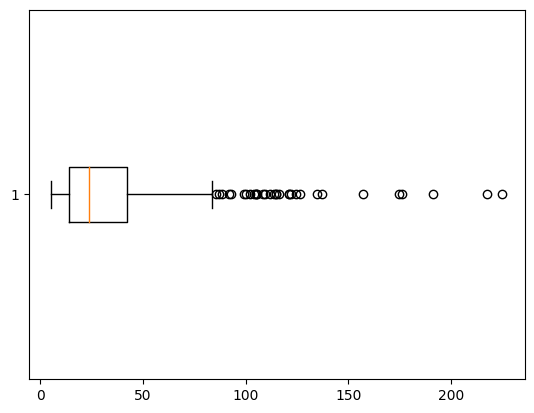

In [128]:
plt.boxplot(df_ventes['price'],vert = False)

In [129]:
# On peut, par rapport à cette boîte à moustache, estimer les limites des outliers à environ 5 pour le minimum, et 93 pour le maximum

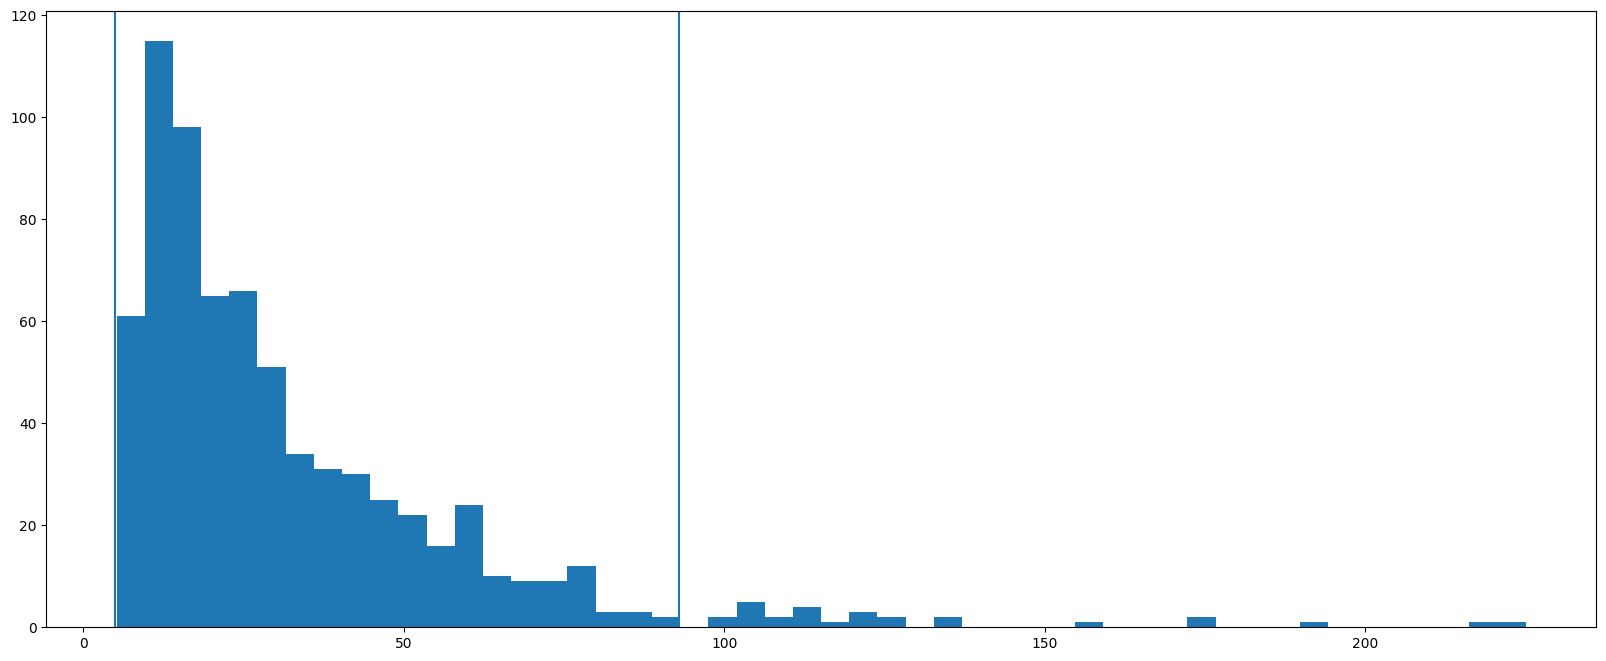

In [130]:
plt.figure(figsize=(20,8))
plt.hist(df_ventes['price'], bins=50)
plt.axvline(x=5)
plt.axvline(x=93)

In [131]:
# Ainsi nous allons définir une list d'outliers potentiels

In [132]:
outl_graph_price = df_ventes[df_ventes['price']>93]

In [133]:
outl_graph_price

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
63,15382.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,...,product,NaN,0.0,4115,1,100.0,11,instock,15382.0,both
199,15940.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,product,NaN,0.0,4352,1,225.0,0,outofstock,15940.0,both
201,12589.0,0.0,0.0,0.0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,...,product,NaN,0.0,4355,1,126.5,2,instock,12589.0,both
218,3510.0,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,product,NaN,0.0,4402,1,176.0,8,instock,3510.0,both
219,3507.0,0.0,0.0,0.0,0.0,2.0,taxable,NaN,2.0,2018-03-22 11:32:55,...,product,NaN,0.0,4404,1,108.5,2,instock,3507.0,both
221,7819.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,...,product,NaN,0.0,4406,1,157.0,3,instock,7819.0,both
222,3509.0,0.0,0.0,0.0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,...,product,NaN,0.0,4407,1,104.0,6,instock,3509.0,both
227,12857.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,product,NaN,0.0,4582,1,109.6,7,instock,12857.0,both
380,14805.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-05-15 10:10:57,...,product,NaN,0.0,4903,1,102.3,20,instock,14805.0,both
381,14220.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-05-15 10:23:41,...,product,NaN,0.0,4904,1,137.0,13,instock,14220.0,both


In [134]:
# Dans un second temps nous allons considérer la quantité de produits vendus

{'whiskers': [<matplotlib.lines.Line2D at 0x26285feb3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26285ff86d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26285feaa50>],
 'medians': [<matplotlib.lines.Line2D at 0x26285ff9850>],
 'fliers': [<matplotlib.lines.Line2D at 0x26285efd6d0>],
 'means': []}

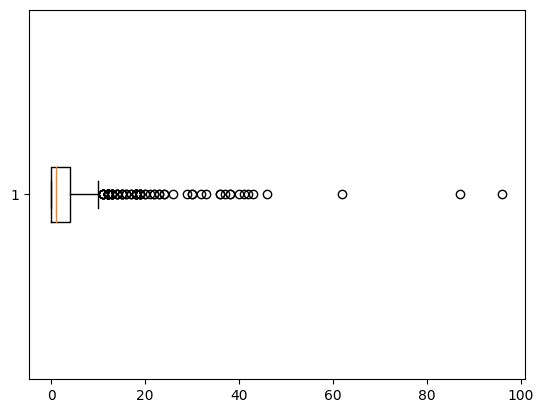

In [135]:
plt.boxplot(df_ventes['total_sales'],vert = False)

In [136]:
# On peut, par rapport à cette boîte à moustache, estimer les limites des outliers à environ 0 pour le minimum, et 19 pour le maximum

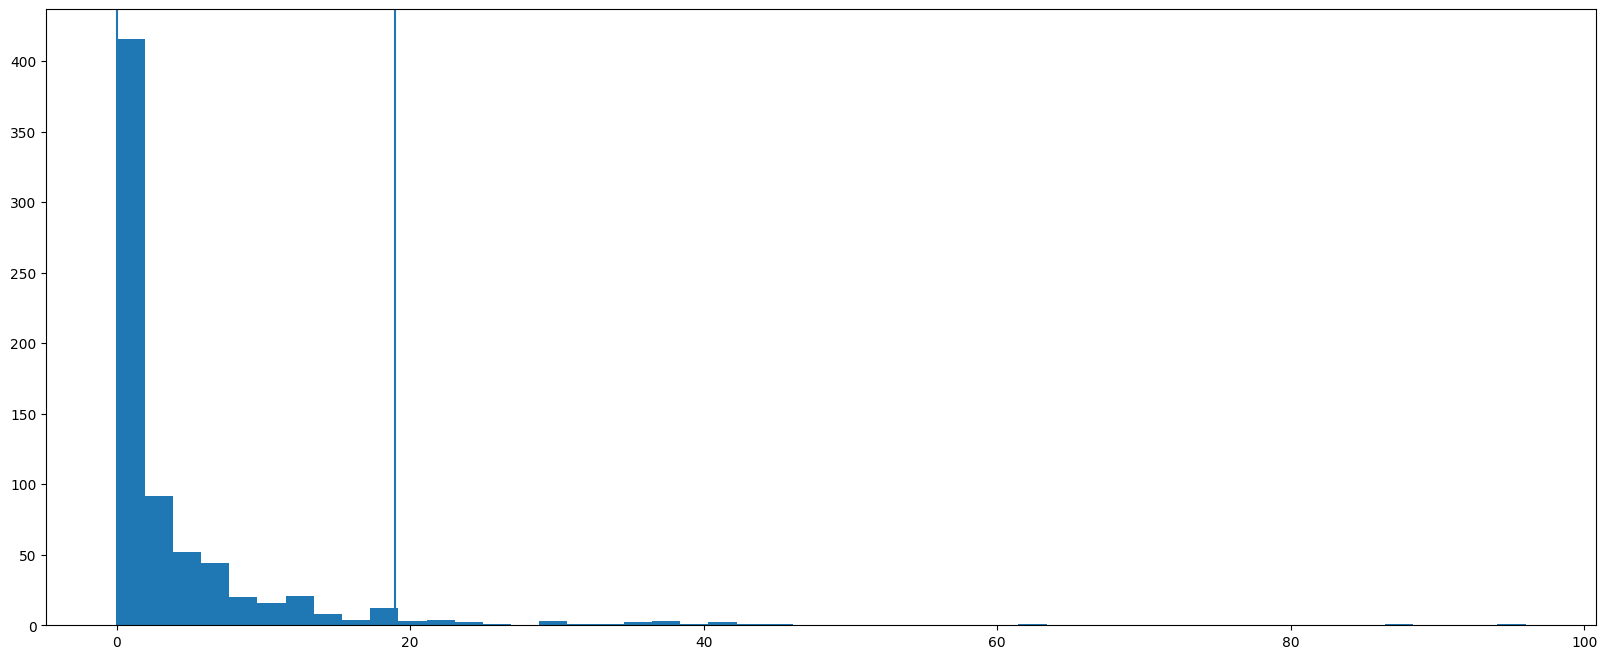

In [137]:
plt.figure(figsize=(20,8))
plt.hist(df_ventes['total_sales'], bins=50)
plt.axvline(x=0)
plt.axvline(x=19)

In [138]:
# Ainsi nous allons définir une list d'outliers potentiels

In [139]:
outl_graph_total_sales = df_ventes[df_ventes['total_sales']>19]

In [140]:
outl_graph_total_sales

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
17,13127.0,0.0,0.0,0.0,0.0,23.0,taxable,NaN,2.0,2018-02-12 11:18:33,...,product,NaN,0.0,4053,1,44.3,16,instock,13127.0,both
28,15967.0,0.0,0.0,0.0,0.0,20.0,taxable,NaN,2.0,2018-02-12 13:17:53,...,product,NaN,0.0,4066,1,20.8,65,instock,15967.0,both
30,16416.0,0.0,0.0,0.0,0.0,62.0,taxable,NaN,2.0,2018-02-12 13:42:28,...,product,NaN,0.0,4068,1,16.6,157,instock,16416.0,both
69,304.0,0.0,0.0,0.0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,product,NaN,0.0,4141,1,39.0,1,instock,304.0,both
70,11641.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-13 13:08:44,...,product,NaN,0.0,4142,1,53.0,8,instock,11641.0,both
71,1662.0,0.0,0.0,0.0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,product,NaN,0.0,4144,1,49.0,11,instock,1662.0,both
79,16237.0,0.0,0.0,0.0,0.0,36.0,taxable,NaN,2.0,2018-02-13 14:13:53,...,product,NaN,0.0,4153,1,29.0,0,outofstock,16237.0,both
90,13453.0,0.0,0.0,0.0,0.0,20.0,taxable,NaN,2.0,2018-02-14 15:24:37,...,product,NaN,0.0,4164,1,7.6,19,instock,13453.0,both
97,16210.0,0.0,0.0,0.0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,product,NaN,0.0,4172,1,5.7,167,instock,16210.0,both
109,16189.0,0.0,0.0,0.0,0.0,42.0,taxable,NaN,2.0,2018-02-15 10:10:23,...,product,NaN,0.0,4187,1,13.3,90,instock,16189.0,both


### Analyse des intervales interquartiles
<a id='Analyse_des_intervales_interquartiles'></a>

In [141]:
# Nous allons en premier temps nous interesser aux prix

In [142]:
q3, q1 = np.percentile(df_ventes.price, [75 ,25])
iqr = q3 - q1

In [143]:
print('l\'intervale interquartile est', iqr)
print('le troisieme quartile est', q3)
print('le premier quartile est', q1)

l'intervale interquartile est 28.1
le troisieme quartile est 42.2
le premier quartile est 14.1


In [144]:
seuil_max = q3 + 1.5*iqr 
seuil_min = q1 - 1.5*iqr

In [145]:
outl_int_price = df_ventes.loc[df_ventes['price']>seuil_max]

In [146]:
outl_int_price

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
63,15382.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,...,product,NaN,0.0,4115,1,100.0,11,instock,15382.0,both
65,11668.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,...,product,NaN,0.0,4132,1,88.4,5,instock,11668.0,both
199,15940.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,product,NaN,0.0,4352,1,225.0,0,outofstock,15940.0,both
201,12589.0,0.0,0.0,0.0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,...,product,NaN,0.0,4355,1,126.5,2,instock,12589.0,both
205,13853.0,0.0,0.0,0.0,0.0,1.0,taxable,NaN,2.0,2018-03-02 11:11:48,...,product,NaN,0.0,4359,1,85.6,0,outofstock,13853.0,both
218,3510.0,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,product,NaN,0.0,4402,1,176.0,8,instock,3510.0,both
219,3507.0,0.0,0.0,0.0,0.0,2.0,taxable,NaN,2.0,2018-03-22 11:32:55,...,product,NaN,0.0,4404,1,108.5,2,instock,3507.0,both
221,7819.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,...,product,NaN,0.0,4406,1,157.0,3,instock,7819.0,both
222,3509.0,0.0,0.0,0.0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,...,product,NaN,0.0,4407,1,104.0,6,instock,3509.0,both
227,12857.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,product,NaN,0.0,4582,1,109.6,7,instock,12857.0,both


In [147]:
# Nous allons maintenant nous interesser aux ventes réalisées

In [148]:
q3_bis, q1_bis = np.percentile(df_ventes.total_sales, [75 ,25])
iqr_bis = q3_bis - q1_bis

In [149]:
print('l\'intervale interquartile est', iqr_bis)
print('le troisieme quartile est', q3_bis)
print('le premier quartile est', q1_bis)

l'intervale interquartile est 4.0
le troisieme quartile est 4.0
le premier quartile est 0.0


In [150]:
seuil_max_bis = q3_bis + 1.5*iqr_bis 
seuil_min_bis = q1_bis - 1.5*iqr_bis

In [151]:
outl_int_total_sales = df_ventes.loc[df_ventes['total_sales']>seuil_max_bis]

In [152]:
outl_int_total_sales

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
9,16041.0,0.0,0.0,0.0,0.0,14.0,taxable,NaN,2.0,2018-02-12 10:09:03,...,product,NaN,0.0,4045,1,42.6,66,instock,16041.0,both
17,13127.0,0.0,0.0,0.0,0.0,23.0,taxable,NaN,2.0,2018-02-12 11:18:33,...,product,NaN,0.0,4053,1,44.3,16,instock,13127.0,both
20,16039.0,0.0,0.0,0.0,0.0,18.0,taxable,NaN,2.0,2018-02-12 11:56:27,...,product,NaN,0.0,4057,1,8.7,112,instock,16039.0,both
21,16318.0,0.0,0.0,0.0,0.0,11.0,taxable,NaN,2.0,2018-02-12 12:07:23,...,product,NaN,0.0,4058,1,8.7,267,instock,16318.0,both
28,15967.0,0.0,0.0,0.0,0.0,20.0,taxable,NaN,2.0,2018-02-12 13:17:53,...,product,NaN,0.0,4066,1,20.8,65,instock,15967.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,15343.0,0.0,0.0,0.0,0.0,17.0,taxable,NaN,2.0,2019-04-06 09:59:39,...,product,NaN,0.0,5922,1,48.5,0,outofstock,15343.0,both
623,16159.0,0.0,0.0,0.0,0.0,18.0,taxable,NaN,2.0,2019-04-26 11:08:24,...,product,NaN,0.0,6042,1,8.5,0,outofstock,16159.0,both
624,16264.0,0.0,0.0,0.0,0.0,38.0,taxable,NaN,2.0,2019-05-03 11:18:00,...,product,NaN,0.0,6047,1,10.9,46,instock,16264.0,both
650,16580.0,0.0,0.0,0.0,0.0,41.0,taxable,NaN,2.0,2019-07-24 09:31:48,...,product,NaN,0.0,6206,1,25.2,120,instock,16580.0,both


### Analyse du z-score
<a id='Analyse_du_z-score'></a>

In [153]:
# Nous allons maintenant réaliser une analyse du z-score, qui a pour formule : z score = (x-moyenne)/écart-type

In [154]:
# Pour cela, nous allons répertorier les z-scores des deux colonnes nous interessants directement dans le dataframe df_ventes 

In [155]:
# Tout d'abord nous allons nous atteler aux prix

In [156]:
df_ventes['zscore_price'] = stats.zscore(df_ventes['price'])

In [157]:
outl_z_price = df_ventes.loc[df_ventes['zscore_price']>3]

In [158]:
outl_z_price

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price
199,15940.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,NaN,0.0,4352,1,225.0,0,outofstock,15940.0,both,6.922062
201,12589.0,0.0,0.0,0.0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,...,NaN,0.0,4355,1,126.5,2,instock,12589.0,both,3.380057
218,3510.0,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,NaN,0.0,4402,1,176.0,8,instock,3510.0,both,5.160049
221,7819.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,...,NaN,0.0,4406,1,157.0,3,instock,7819.0,both,4.476820
381,14220.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-05-15 10:23:41,...,NaN,0.0,4904,1,137.0,13,instock,14220.0,both,3.757631
425,14581.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,...,NaN,0.0,5001,1,217.5,20,instock,14581.0,both,6.652366
510,14915.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-01-15 15:30:49,...,NaN,0.0,5612,1,124.8,12,instock,14915.0,both,3.318925
552,15185.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,NaN,0.0,5767,1,175.0,12,instock,15185.0,both,5.124089
586,14983.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,...,NaN,0.0,5892,1,191.3,10,instock,14983.0,both,5.710228
602,14775.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-04-04 16:49:37,...,NaN,0.0,5917,1,122.0,4,instock,14775.0,both,3.218239


In [159]:
# Nous pourrions ainsi nous le représenter

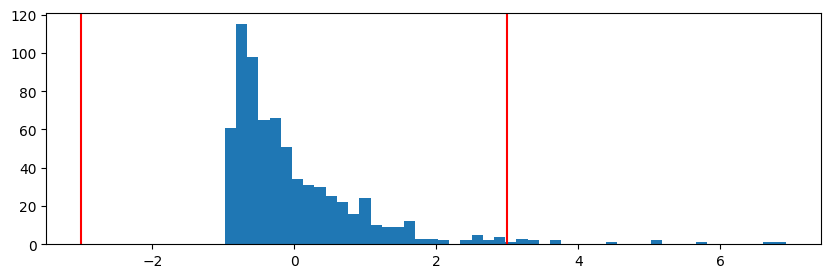

In [160]:
plt.figure(figsize=(10,3))
plt.hist(df_ventes['zscore_price'], bins=50)
plt.axvline(x=-3, color='red')
plt.axvline(x=3, color='red')

In [161]:
# Nous allons maintenant nous intéresser aux ventes des produits

In [162]:
df_ventes['zscore_total_sales'] = stats.zscore(df_ventes['total_sales'])

In [163]:
outl_z_total_sales = df_ventes.loc[df_ventes['zscore_total_sales']>3]

In [164]:
outl_z_total_sales

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price,zscore_total_sales
30,16416.0,0.0,0.0,0.0,0.0,62.0,taxable,NaN,2.0,2018-02-12 13:42:28,...,0.0,4068,1,16.6,157,instock,16416.0,both,-0.571886,6.810833
69,304.0,0.0,0.0,0.0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,0.0,4141,1,39.0,1,instock,304.0,both,0.233605,4.227226
70,11641.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-13 13:08:44,...,0.0,4142,1,53.0,8,instock,11641.0,both,0.737037,3.052859
71,1662.0,0.0,0.0,0.0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,0.0,4144,1,49.0,11,instock,1662.0,both,0.593200,9.746750
79,16237.0,0.0,0.0,0.0,0.0,36.0,taxable,NaN,2.0,2018-02-13 14:13:53,...,0.0,4153,1,29.0,0,outofstock,16237.0,both,-0.125989,3.757479
97,16210.0,0.0,0.0,0.0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,0.0,4172,1,5.7,167,instock,16210.0,both,-0.963844,4.579536
109,16189.0,0.0,0.0,0.0,0.0,42.0,taxable,NaN,2.0,2018-02-15 10:10:23,...,0.0,4187,1,13.3,90,instock,16189.0,both,-0.690552,4.462100
119,16295.0,0.0,0.0,0.0,0.0,46.0,taxable,NaN,2.0,2018-02-15 14:05:06,...,0.0,4200,1,5.8,190,instock,16295.0,both,-0.960248,4.931846
155,16317.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-20 11:38:11,...,0.0,4250,1,19.5,14,instock,16317.0,both,-0.467604,3.052859
194,7818.0,0.0,0.0,0.0,0.0,96.0,taxable,NaN,2.0,2018-03-01 14:02:44,...,0.0,4334,1,49.0,0,outofstock,7818.0,both,0.593200,10.803680


In [165]:
# Nous pourrions ainsi nous le représenter

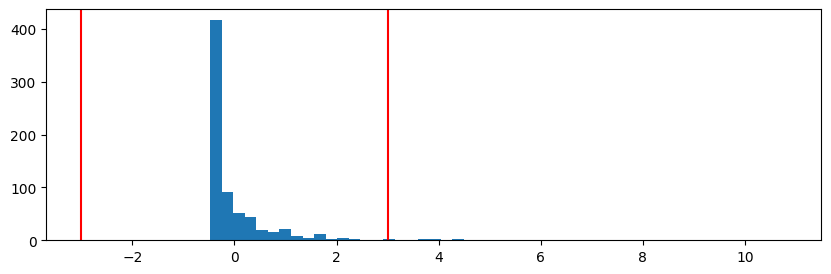

In [166]:
plt.figure(figsize=(10,3))
plt.hist(df_ventes['zscore_total_sales'], bins=50)
plt.axvline(x=-3, color='red')
plt.axvline(x=3, color='red')

### Merge des Outliners
<a id='Merge_des_Outliners'></a>

In [167]:
# Nous allons réaliser un merge des outliers des 3 différentes analyses pour se concentrer sur les outliers les plus conséquents (se révélant sur tous les tableaux d'analyse réalisées)

In [168]:
# Merge des Outliers price

In [169]:
outl_price = outl_graph_price.merge(outl_int_price, on=['sku', 'price'], how='inner').merge(outl_z_price, on=['sku', 'price'], how='inner')

In [170]:
outl_price

,sku,virtual_x,downloadable_x,rating_count_x,average_rating_x,total_sales_x,tax_status_x,tax_class_x,post_author_x,post_date_x,...,post_type,post_mime_type,comment_count,product_id,onsale_web,stock_quantity,stock_status,id_web,_merge,zscore_price
0,15940.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,product,NaN,0.0,4352,1,0,outofstock,15940.0,both,6.922062
1,12589.0,0.0,0.0,0.0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,...,product,NaN,0.0,4355,1,2,instock,12589.0,both,3.380057
2,3510.0,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,product,NaN,0.0,4402,1,8,instock,3510.0,both,5.160049
3,7819.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,...,product,NaN,0.0,4406,1,3,instock,7819.0,both,4.476820
4,14220.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-05-15 10:23:41,...,product,NaN,0.0,4904,1,13,instock,14220.0,both,3.757631
5,14581.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,...,product,NaN,0.0,5001,1,20,instock,14581.0,both,6.652366
6,14915.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-01-15 15:30:49,...,product,NaN,0.0,5612,1,12,instock,14915.0,both,3.318925
7,15185.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,product,NaN,0.0,5767,1,12,instock,15185.0,both,5.124089
8,14983.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,...,product,NaN,0.0,5892,1,10,instock,14983.0,both,5.710228
9,14775.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-04-04 16:49:37,...,product,NaN,0.0,5917,1,4,instock,14775.0,both,3.218239


In [171]:
# Merge des Outliers total_sales

In [172]:
outl_total_sales = outl_graph_total_sales.merge(outl_int_total_sales, on=['sku', 'total_sales'], how='inner').merge(outl_z_total_sales, on=['sku', 'total_sales'], how='inner')

In [173]:
outl_total_sales

,sku,virtual_x,downloadable_x,rating_count_x,average_rating_x,total_sales,tax_status_x,tax_class_x,post_author_x,post_date_x,...,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price,zscore_total_sales
0,16416.0,0.0,0.0,0.0,0.0,62.0,taxable,NaN,2.0,2018-02-12 13:42:28,...,0.0,4068,1,16.6,157,instock,16416.0,both,-0.571886,6.810833
1,304.0,0.0,0.0,0.0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,0.0,4141,1,39.0,1,instock,304.0,both,0.233605,4.227226
2,11641.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-13 13:08:44,...,0.0,4142,1,53.0,8,instock,11641.0,both,0.737037,3.052859
3,1662.0,0.0,0.0,0.0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,0.0,4144,1,49.0,11,instock,1662.0,both,0.593200,9.746750
4,16237.0,0.0,0.0,0.0,0.0,36.0,taxable,NaN,2.0,2018-02-13 14:13:53,...,0.0,4153,1,29.0,0,outofstock,16237.0,both,-0.125989,3.757479
5,16210.0,0.0,0.0,0.0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,0.0,4172,1,5.7,167,instock,16210.0,both,-0.963844,4.579536
6,16189.0,0.0,0.0,0.0,0.0,42.0,taxable,NaN,2.0,2018-02-15 10:10:23,...,0.0,4187,1,13.3,90,instock,16189.0,both,-0.690552,4.462100
7,16295.0,0.0,0.0,0.0,0.0,46.0,taxable,NaN,2.0,2018-02-15 14:05:06,...,0.0,4200,1,5.8,190,instock,16295.0,both,-0.960248,4.931846
8,16317.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-20 11:38:11,...,0.0,4250,1,19.5,14,instock,16317.0,both,-0.467604,3.052859
9,7818.0,0.0,0.0,0.0,0.0,96.0,taxable,NaN,2.0,2018-03-01 14:02:44,...,0.0,4334,1,49.0,0,outofstock,7818.0,both,0.593200,10.803680


## Calcul du Chiffre d'Affaire
<a id='Calcul_du_Chiffre_d_Affaire'></a>

In [174]:
# Nous allons dans un premier temps calculer le chiffre d'affaire de chaque produit et présenter l'ensemble des produits et leur chiffre d'affaire

In [175]:
df_ventes['chiffre_affaire'] = df_ventes.price * df_ventes.total_sales

In [176]:
df_ventes[['sku', 'post_name', 'chiffre_affaire']]

,sku,post_name,chiffre_affaire
0,15298.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,15296.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,15300.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,19814.0,pierre-jean-villa-igp-gamine-2018,42.3
4,19815.0,pierre-jean-villa-cote-rotie-carmina-2017,0.0
...,...,...,...
708,16135.0,mouthes-le-bihan-aime-chai-2015,42.0
709,15891.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
710,15887.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
711,131271.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


In [177]:
# Pour d'avantage de facilité, nous allons créer des dataframes sans les outliers price, puis sans les outliers total_sales, puis sans les outliers price et total_sales

In [178]:
outl_price.sku

0     15940.0
1     12589.0
2      3510.0
3      7819.0
4     14220.0
5     14581.0
6     14915.0
7     15185.0
8     14983.0
9     14775.0
10    14923.0
11    15126.0
12    15072.0
13    15070.0
Name: sku, dtype: float64

In [179]:
df_ss_oult_price = df_ventes.loc[~df_ventes.sku.isin(outl_price.sku)]

In [180]:
df_ss_oult_price

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price,zscore_total_sales,chiffre_affaire
0,15298.0,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,3847,1,24.2,0,outofstock,15298.0,both,-0.298595,0.234379,145.2
1,15296.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,3849,1,34.3,0,outofstock,15296.0,both,0.064596,-0.470241,0.0
2,15300.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,3850,1,20.8,0,outofstock,15300.0,both,-0.420857,-0.470241,0.0
3,19814.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,4032,1,14.1,0,outofstock,19814.0,both,-0.661785,-0.117931,42.3
4,19815.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,4039,1,46.0,0,outofstock,19815.0,both,0.485321,-0.470241,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,16135.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,6930,1,8.4,83,instock,16135.0,both,-0.866754,0.116943,42.0
709,15891.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,7023,1,27.5,15,instock,15891.0,both,-0.179928,-0.470241,0.0
710,15887.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,7025,1,69.0,2,instock,15887.0,both,1.312389,-0.470241,0.0
711,131271.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,7247,1,54.8,23,instock,131271.0,both,0.801764,-0.470241,0.0


In [181]:
df_ss_oult_total_sales = df_ventes.loc[~df_ventes.sku.isin(outl_total_sales.sku)]

In [182]:
df_ss_oult_total_sales

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price,zscore_total_sales,chiffre_affaire
0,15298.0,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,3847,1,24.2,0,outofstock,15298.0,both,-0.298595,0.234379,145.2
1,15296.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,3849,1,34.3,0,outofstock,15296.0,both,0.064596,-0.470241,0.0
2,15300.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,3850,1,20.8,0,outofstock,15300.0,both,-0.420857,-0.470241,0.0
3,19814.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,4032,1,14.1,0,outofstock,19814.0,both,-0.661785,-0.117931,42.3
4,19815.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,4039,1,46.0,0,outofstock,19815.0,both,0.485321,-0.470241,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,16135.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,6930,1,8.4,83,instock,16135.0,both,-0.866754,0.116943,42.0
709,15891.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,7023,1,27.5,15,instock,15891.0,both,-0.179928,-0.470241,0.0
710,15887.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,7025,1,69.0,2,instock,15887.0,both,1.312389,-0.470241,0.0
711,131271.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,7247,1,54.8,23,instock,131271.0,both,0.801764,-0.470241,0.0


In [183]:
list(set(outl_total_sales.sku).union(set(outl_price.sku)))

[14915.0,
 16580.0,
 15940.0,
 14983.0,
 16264.0,
 7818.0,
 7819.0,
 14220.0,
 16077.0,
 14923.0,
 15185.0,
 16210.0,
 16149.0,
 15126.0,
 15070.0,
 16416.0,
 15072.0,
 14775.0,
 38.0,
 16295.0,
 16189.0,
 16237.0,
 12589.0,
 304.0,
 15349.0,
 14581.0,
 3510.0,
 11641.0,
 16317.0,
 1662.0,
 15807.0]

In [184]:
list_outl = list(set(outl_total_sales.sku).union(set(outl_price.sku)))

In [185]:
len(list_outl)

31

In [186]:
df_ss_oult = df_ventes.loc[~df_ventes.sku.isin(list_outl)]

In [187]:
df_ss_oult

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price,zscore_total_sales,chiffre_affaire
0,15298.0,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,3847,1,24.2,0,outofstock,15298.0,both,-0.298595,0.234379,145.2
1,15296.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,3849,1,34.3,0,outofstock,15296.0,both,0.064596,-0.470241,0.0
2,15300.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,3850,1,20.8,0,outofstock,15300.0,both,-0.420857,-0.470241,0.0
3,19814.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,4032,1,14.1,0,outofstock,19814.0,both,-0.661785,-0.117931,42.3
4,19815.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,4039,1,46.0,0,outofstock,19815.0,both,0.485321,-0.470241,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,16135.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,6930,1,8.4,83,instock,16135.0,both,-0.866754,0.116943,42.0
709,15891.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,7023,1,27.5,15,instock,15891.0,both,-0.179928,-0.470241,0.0
710,15887.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,7025,1,69.0,2,instock,15887.0,both,1.312389,-0.470241,0.0
711,131271.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,7247,1,54.8,23,instock,131271.0,both,0.801764,-0.470241,0.0


### Chiffre d'affaire global
<a id='Chiffre_d_affaire_global'></a>

In [188]:
# Chiffre d'affaire total

In [189]:
df_ventes.chiffre_affaire.sum()

70318.6

In [190]:
# Chiffre d'affaire sans outlier price

In [191]:
df_ss_oult_price.chiffre_affaire.sum()

63985.2

In [192]:
# Chiffre d'affaire sans outlier total_sales

In [193]:
df_ss_oult_total_sales.chiffre_affaire.sum()

49917.4

In [194]:
# Chiffre d'affaire sans outlier

In [195]:
df_ss_oult.chiffre_affaire.sum()

43584.0

Text(0.5, 1.0, 'Comparaison total chiffre d affaire avec et sans outliers')

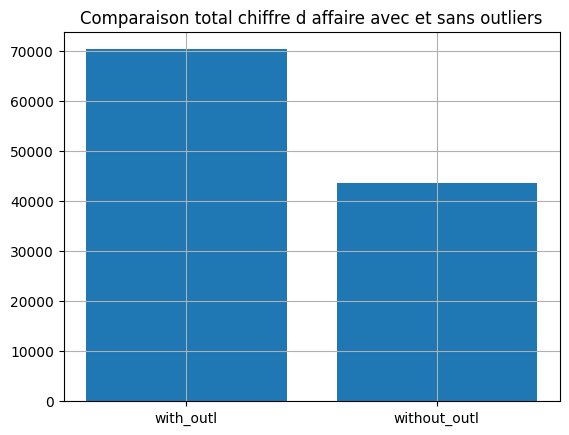

In [196]:
plt.bar(['with_outl', 'without_outl'], [70318.6, 43584.0])
plt.grid()
plt.title('Comparaison total chiffre d affaire avec et sans outliers')

### Moyenne du chiffre d'affaire par produit
<a id='Moyenne_du_chiffre_d_affaire_par_produit'></a>

In [197]:
# Moyenne du chiffre d'affaire par produit

In [198]:
df_ventes.chiffre_affaire.sum()/df_ventes.chiffre_affaire.count()

98.62356241234222

In [199]:
# top 5 des produits par CA

In [200]:
df_ventes[['sku', 'post_name', 'chiffre_affaire']].sort_values(by=['chiffre_affaire'],ascending=False).head()

,sku,post_name,chiffre_affaire
194,7818.0,champagne-gosset-grand-blanc-de-blanc,4704.0
71,1662.0,champagne-gosset-grand-rose,4263.0
218,3510.0,cognac-frapin-vip-xo,2288.0
70,11641.0,champagne-gosset-grand-millesime-2006,1590.0
69,304.0,gosset-champagne-grande-reserve,1560.0


In [201]:
# Moyenne du chiffre d'affaire par produit sans outlier price

In [202]:
df_ss_oult_price.chiffre_affaire.sum()/df_ss_oult_price.chiffre_affaire.count()

91.5381974248927

In [203]:
# top 5 des produits par CA

In [204]:
df_ss_oult_price[['sku', 'post_name', 'chiffre_affaire']].sort_values(by=['chiffre_affaire'],ascending=False).head()

,sku,post_name,chiffre_affaire
194,7818.0,champagne-gosset-grand-blanc-de-blanc,4704.0
71,1662.0,champagne-gosset-grand-rose,4263.0
70,11641.0,champagne-gosset-grand-millesime-2006,1590.0
69,304.0,gosset-champagne-grande-reserve,1560.0
79,16237.0,elian-daros-cotes-du-marmandais-clos-baquey-2015,1044.0


In [205]:
# Moyenne du chiffre d'affaire par produit sans outlier total_sales

In [206]:
df_ss_oult_total_sales.chiffre_affaire.sum()/df_ss_oult_total_sales.chiffre_affaire.count()

71.72040229885057

In [207]:
# top 5 des produits par CA

In [208]:
df_ss_oult_total_sales[['sku', 'post_name', 'chiffre_affaire']].sort_values(by=['chiffre_affaire'],ascending=False).head()

,sku,post_name,chiffre_affaire
218,3510.0,cognac-frapin-vip-xo,2288.0
201,12589.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5
199,15940.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
17,13127.0,clos-du-mont-olivet-chateauneuf-du-pape-2012,1018.9
228,15476.0,marc-colin-et-fils-chassagne-montrachet-blanc-...,1009.7


In [209]:
# Moyenne du chiffre d'affaire par produit sans outlier

In [210]:
df_ss_oult.chiffre_affaire.sum()/df_ss_oult.chiffre_affaire.count()

63.90615835777126

In [211]:
# top 5 des produits par CA

In [212]:
df_ss_oult[['sku', 'post_name', 'chiffre_affaire']].sort_values(by=['chiffre_affaire'],ascending=False).head()

,sku,post_name,chiffre_affaire
17,13127.0,clos-du-mont-olivet-chateauneuf-du-pape-2012,1018.9
228,15476.0,marc-colin-et-fils-chassagne-montrachet-blanc-...,1009.7
444,15346.0,albert-mann-pinot-noir-grand-h-2017,958.4
390,15533.0,alain-graillot-crozes-hermitage-rouge-la-guira...,892.8
604,15343.0,albert-mann-pinot-noir-clos-de-la-faille-2017,824.5


### Listing des Outliers considérés dans ce calcul
<a id='Listing_des_Outliners_considérés_dans_ce_calcul'></a>

In [213]:
# Afin de faciliter la vérification, voici la liste des outliers considérés :

In [214]:
# listing des outliers price

In [215]:
outl_price

,sku,virtual_x,downloadable_x,rating_count_x,average_rating_x,total_sales_x,tax_status_x,tax_class_x,post_author_x,post_date_x,...,post_type,post_mime_type,comment_count,product_id,onsale_web,stock_quantity,stock_status,id_web,_merge,zscore_price
0,15940.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,product,NaN,0.0,4352,1,0,outofstock,15940.0,both,6.922062
1,12589.0,0.0,0.0,0.0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,...,product,NaN,0.0,4355,1,2,instock,12589.0,both,3.380057
2,3510.0,0.0,0.0,0.0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,product,NaN,0.0,4402,1,8,instock,3510.0,both,5.160049
3,7819.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,...,product,NaN,0.0,4406,1,3,instock,7819.0,both,4.476820
4,14220.0,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,2018-05-15 10:23:41,...,product,NaN,0.0,4904,1,13,instock,14220.0,both,3.757631
5,14581.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,...,product,NaN,0.0,5001,1,20,instock,14581.0,both,6.652366
6,14915.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-01-15 15:30:49,...,product,NaN,0.0,5612,1,12,instock,14915.0,both,3.318925
7,15185.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,product,NaN,0.0,5767,1,12,instock,15185.0,both,5.124089
8,14983.0,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,...,product,NaN,0.0,5892,1,10,instock,14983.0,both,5.710228
9,14775.0,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,2019-04-04 16:49:37,...,product,NaN,0.0,5917,1,4,instock,14775.0,both,3.218239


In [216]:
# listing des outliers total_sales

In [217]:
outl_total_sales

,sku,virtual_x,downloadable_x,rating_count_x,average_rating_x,total_sales,tax_status_x,tax_class_x,post_author_x,post_date_x,...,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,zscore_price,zscore_total_sales
0,16416.0,0.0,0.0,0.0,0.0,62.0,taxable,NaN,2.0,2018-02-12 13:42:28,...,0.0,4068,1,16.6,157,instock,16416.0,both,-0.571886,6.810833
1,304.0,0.0,0.0,0.0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,0.0,4141,1,39.0,1,instock,304.0,both,0.233605,4.227226
2,11641.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-13 13:08:44,...,0.0,4142,1,53.0,8,instock,11641.0,both,0.737037,3.052859
3,1662.0,0.0,0.0,0.0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,0.0,4144,1,49.0,11,instock,1662.0,both,0.593200,9.746750
4,16237.0,0.0,0.0,0.0,0.0,36.0,taxable,NaN,2.0,2018-02-13 14:13:53,...,0.0,4153,1,29.0,0,outofstock,16237.0,both,-0.125989,3.757479
5,16210.0,0.0,0.0,0.0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,0.0,4172,1,5.7,167,instock,16210.0,both,-0.963844,4.579536
6,16189.0,0.0,0.0,0.0,0.0,42.0,taxable,NaN,2.0,2018-02-15 10:10:23,...,0.0,4187,1,13.3,90,instock,16189.0,both,-0.690552,4.462100
7,16295.0,0.0,0.0,0.0,0.0,46.0,taxable,NaN,2.0,2018-02-15 14:05:06,...,0.0,4200,1,5.8,190,instock,16295.0,both,-0.960248,4.931846
8,16317.0,0.0,0.0,0.0,0.0,30.0,taxable,NaN,2.0,2018-02-20 11:38:11,...,0.0,4250,1,19.5,14,instock,16317.0,both,-0.467604,3.052859
9,7818.0,0.0,0.0,0.0,0.0,96.0,taxable,NaN,2.0,2018-03-01 14:02:44,...,0.0,4334,1,49.0,0,outofstock,7818.0,both,0.593200,10.803680


## Conclusion
<a id='Conclusion'></a>

Pour conclure, le but de cette étude n'est pas de dégager une stratégie commerciale et une analyse dans ce sens, mais bien de proposer une première vue des données, une appréciation quand à leur lecture et des stratégies possibles à envisager. Ainsi, Trois points sont à relever :



Dans un premier temps, cette première vue des données dont nous disposons peut permettre d'élaborer des stratégie commerciales, certes, mais qui nécessitera d'autres relevés futurs avec des indicateurs de temps, pour mesurer l'impact et l'évolution de la stratégie élaborée sur le chiffre d'affaire généré.


En second temps, comme nous l avons vu lors de la jointure de nos dataframes j1 et Web, une liste de 111 produits figurent ne pas être relevés dans notre jeu de données issu d ERF, mais figurent l être pour le jeu de données issu de Web. Il serait le bienvenue d investiguer à ce sujet pour comprendre l origine de cette différence qui peut potentiellement avoir un impact sur la compréhension du chiffre d affaire.


Enfin, comme nous venons de l'apprécier avec l'étude du chiffre d'affaire et l'impact des outliers - Pour rappel 70318.6 CA généré avec outliers, contre 43584.0 CA généré sans ces outliers, soit une différence de 26734.6 CA. Ce qui représente une augmentation du ca sans outliers de pratiquement 38 % - il serait judicieux de vérifier la véracité des outliers et les stratégies possibles à élaborer autours de ces données.
